# Assignment - 10
# Name: Praveen Balireddy
# Roll: 2018201052

In [1]:
!wget http://preon.iiit.ac.in/~sanjoy_chowdhury/GoogleStocks.csv

--2019-04-09 17:09:47--  http://preon.iiit.ac.in/~sanjoy_chowdhury/GoogleStocks.csv
Resolving preon.iiit.ac.in (preon.iiit.ac.in)... 196.12.53.50
Connecting to preon.iiit.ac.in (preon.iiit.ac.in)|196.12.53.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56527 (55K) [text/csv]
Saving to: ‘GoogleStocks.csv.2’

GoogleStocks.csv.2  100%[===================>]  55.20K  94.0KB/s    in 0.6s    

2019-04-09 17:09:48 (94.0 KB/s) - ‘GoogleStocks.csv.2’ saved [56527/56527]



### Importing Libraries

In [2]:
!pip install hmmlearn

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn import metrics
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pickle
import warnings
from hmmlearn import hmm
import random
warnings.filterwarnings('ignore')

### Setting seed

In [0]:
np.random.seed(10)

### Function to split the data into train and validation(80-20)

In [0]:
def splitData(X ,Y, t_size = 0.2, r_state = 10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = t_size,
                                                        random_state = r_state, shuffle=False)
    return (X_train, X_test, y_train, y_test)

### Reading Input

In [0]:
df = pd.read_csv("./GoogleStocks.csv",index_col="date",parse_dates=True)

### Data Exploration

In [7]:
df.head()

,close,volume,open,high,low
date,,,,,
2019-04-09 15:07:00,"1,169.41","1,037,784","1,185.50","1,187.559","1,159.37"
2019-03-26 00:00:00,1184.6200,1894639.0000,1198.5300,1202.8300,1176.7200
2019-03-25 00:00:00,1193.0000,1493841.0000,1196.9300,1206.3975,1187.0400
2019-03-22 00:00:00,1205.5000,1668910.0000,1226.3200,1230.0000,1202.8250
2019-03-21 00:00:00,1231.5400,1195899.0000,1216.0000,1231.7900,1213.1500


In [0]:
df = df.drop(pd.to_datetime('2019-04-09 15:07:00'))

In [0]:
df = df.apply(pd.to_numeric)

In [0]:
df = df.sort_index()
# df = df.sort_values(by=["date"])

In [11]:
df.head()

,close,volume,open,high,low
date,,,,,
2016-03-28,733.53,1300817.0,736.79,738.99,732.50
2016-03-29,744.77,1902254.0,734.59,747.25,728.76
2016-03-30,750.53,1782278.0,750.10,757.88,748.74
2016-03-31,744.95,1718638.0,749.25,750.85,740.94
2016-04-01,749.91,1576240.0,738.60,750.34,737.00


In [12]:
df.describe()

,close,volume,open,high,low
count,755.000000,7.550000e+02,755.000000,755.000000,755.000000
mean,956.761192,1.591754e+06,956.455861,964.608985,948.292786
std,159.343122,6.850534e+05,159.292303,161.829749,156.755994
min,668.260000,5.369960e+05,671.000000,672.300000,663.284000
25%,795.897500,1.174820e+06,796.300000,801.430000,791.750000
50%,969.960000,1.401756e+06,969.460000,974.980000,960.520100
75%,1088.680000,1.814982e+06,1087.500000,1099.675000,1073.712500
max,1268.330000,5.949699e+06,1271.000000,1273.890000,1249.020000


In [0]:
df['avg_price'] = df['high'] + df['low']
df['avg_price'] = df['avg_price'].apply(lambda x : x/2)

In [14]:
df.head()

,close,volume,open,high,low,avg_price
date,,,,,,
2016-03-28,733.53,1300817.0,736.79,738.99,732.50,735.745
2016-03-29,744.77,1902254.0,734.59,747.25,728.76,738.005
2016-03-30,750.53,1782278.0,750.10,757.88,748.74,753.310
2016-03-31,744.95,1718638.0,749.25,750.85,740.94,745.895
2016-04-01,749.91,1576240.0,738.60,750.34,737.00,743.670


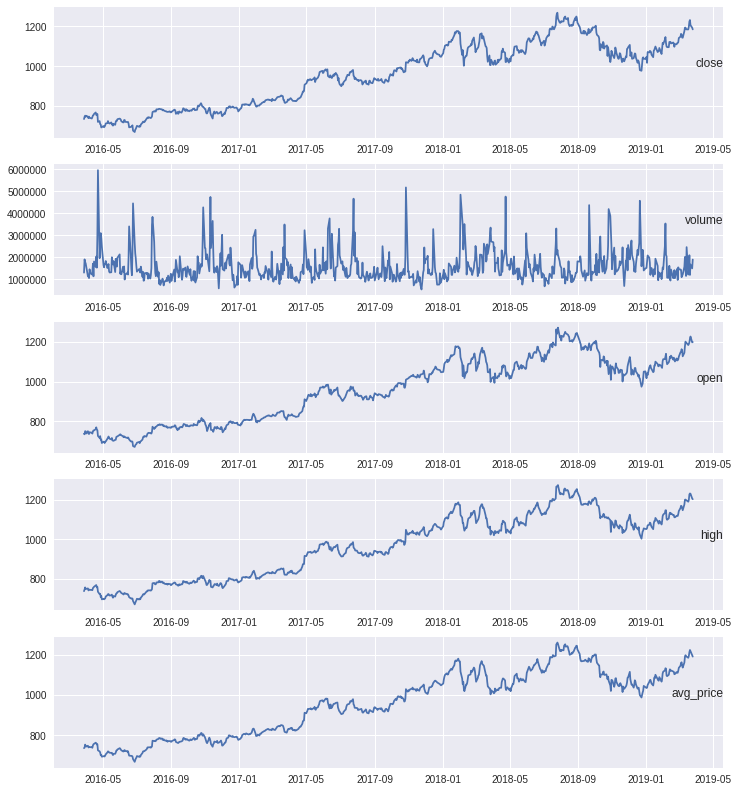

In [15]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5]
i = 1
fig, ax = plt.subplots()
fig.set_size_inches(12,14)
for group in groups:
    ax = plt.subplot(len(groups), 1, i)
    ax.plot(df.index, values[:, group])
    ax.set_title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [0]:
df['date_col'] = df.index

In [17]:
df.head()

,close,volume,open,high,low,avg_price,date_col
date,,,,,,,
2016-03-28,733.53,1300817.0,736.79,738.99,732.50,735.745,2016-03-28
2016-03-29,744.77,1902254.0,734.59,747.25,728.76,738.005,2016-03-29
2016-03-30,750.53,1782278.0,750.10,757.88,748.74,753.310,2016-03-30
2016-03-31,744.95,1718638.0,749.25,750.85,740.94,745.895,2016-03-31
2016-04-01,749.91,1576240.0,738.60,750.34,737.00,743.670,2016-04-01


In [0]:
df_X = df[['volume','avg_price']]
df_Y = df[['open']]

In [0]:
def convert_to_supervised(df_X, df_Y, time_steps=60, out_count=1):
    '''
    Function to convert time series data to supervised learning data 
    '''
    X_train = []
    y_train = []
    axis = []
    for i in range(time_steps, df_X.shape[0], out_count):
        X_train.append(df_X[i-time_steps:i])
        y_train.append(df_Y[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train

### Preprocessing

In [0]:
sc_X = MinMaxScaler(feature_range = (0, 1))
sc_Y = MinMaxScaler(feature_range = (0, 1))
df_X = sc_X.fit_transform(df_X)
df_Y = sc_Y.fit_transform(df_Y)

### Model parameters

In [0]:
hidden_layers = 2
no_cells_hidden = 30
time_steps = 20

In [22]:
X_train1, y_train1 = convert_to_supervised(df_X, df_Y, time_steps, 1)
print(X_train1.shape, y_train1.shape)
X_train, X_val, y_train, y_val = splitData(X_train1, y_train1)
y_train_label, y_val_label = train_test_split(df.iloc[-X_train1.shape[0]:,6], test_size = 0.2,
                                                        random_state = 10, shuffle=False)

(735, 20, 2) (735,)


### Model Building

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [27]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

In [28]:
regressor = Sequential()
regressor.add(LSTM(units = no_cells_hidden, return_sequences = True,
                   input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = no_cells_hidden))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
588/588 [==============================] - 1s 3ms/step - loss: 0.0766
Epoch 2/30
588/588 [==============================] - 0s 722us/step - loss: 0.0145
Epoch 3/30
588/588 [==============================] - 0s 757us/step - loss: 0.0078
Epoch 4/30
588/588 [==============================] - 0s 718us/step - loss: 0.0069
Epoch 5/30
588/588 [==============================] - 0s 708us/step - loss: 0.0067
Epoch 6/30
588/588 [==============================] - 0s 717us/step - loss: 0.0065
Epoch 7/30
588/588 [==============================] - 0s 717us/step - loss: 0.0064
Epoch 8/30
588/588 [==============================] - 0s 695us/step - loss: 0.0058
Epoch 9/30
588/588 [==============================] - 0s 707us/step - loss: 0.0048
Epoch 10/30
588/588 

In [0]:
predicted_stock_price = regressor.predict(X_val)
predicted_stock_price = sc_Y.inverse_transform(predicted_stock_price).flatten()
y_actual = sc_Y.inverse_transform(y_val.reshape(1,-1)).flatten()

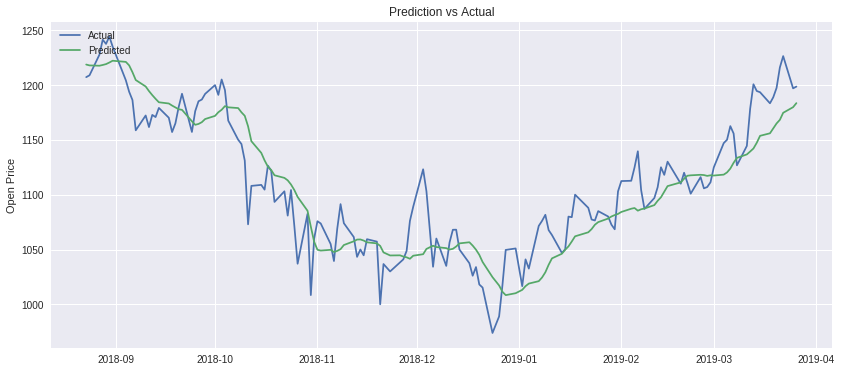

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
ax = plt.subplot(1, 1, 1)
ax.plot(y_val_label, y_actual, label="Actual")
ax.plot(y_val_label, predicted_stock_price,label="Predicted")
ax.set_title("Prediction vs Actual")
ax.set_ylabel("Open Price")
ax.legend(loc='upper left')

In [31]:
print("Mean Squared Error")
print(metrics.mean_squared_error(y_actual,predicted_stock_price))

Mean Squared Error
760.3422575543652


# Q1 - Part1
Perform stock prediction using RNN for the following configurations
![L1](q1-p1.png)

In [0]:
def buildLSTM(no_cells_hidden, X_train_shape, no_hidden_layers=2):
    '''
    Building LSTM
    '''
    regressor = Sequential()
    for i in range(no_hidden_layers-1):
        regressor.add(LSTM(units = no_cells_hidden, return_sequences = True,
                           input_shape = (X_train_shape[1], X_train_shape[2])))
        regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = no_cells_hidden))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return regressor


def runRNN(hidden_layers, time_steps, hidden_nodes):
    '''
    Running RNN for given parameters
    '''
    print("##################################################################################################")
    print("No. of Hidden layers = {0}, no.of cells = {1}, Time steps={2}".format(hidden_layers,
                                                                                hidden_nodes,
                                                                                time_steps))
    axis = df.axes[0]
    X_train1, y_train1 = convert_to_supervised(df_X, df_Y, time_steps, 1)
    X_train, X_val, y_train, y_val = splitData(X_train1, y_train1)
    y_train_label, y_val_label = train_test_split(df.iloc[-X_train1.shape[0]:,6], test_size = 0.2,
                                                        random_state = 10, shuffle=False)
    # Fitting the RNN to the Training set
    regressor = buildLSTM(hidden_nodes, X_train.shape, hidden_layers)
    regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose=0)
    predicted_stock_price = regressor.predict(X_val)
    predicted_stock_price = sc_Y.inverse_transform(predicted_stock_price).flatten()
    y_actual = sc_Y.inverse_transform(y_val.reshape(1,-1)).flatten()
    ## Plotting curve
    fig, ax = plt.subplots()
    fig.set_size_inches(14,6)
    ax = plt.subplot(1, 1, 1)
    ax.plot(y_val_label, y_actual, label="Actual")
    ax.plot(y_val_label, predicted_stock_price,label="Predicted")
    ax.set_title("Prediction vs Actual")
    ax.set_ylabel("Open Price")
    ax.legend(loc='upper left')
    ##printing error
    print("Mean Squared Error")
    print(metrics.mean_squared_error(y_actual,predicted_stock_price))
    plt.show()
#     return predicted_stock_price, metrics.mean_squared_error(y_actual,predicted_stock_price)

In [0]:
hidden_layers = [2,3]
no_cells = [30, 50, 80]
time_steps = [20,50,75]

##################################################################################################
No. of Hidden layers = 2, no.of cells = 30, Time steps=20
Mean Squared Error
697.1196387239918


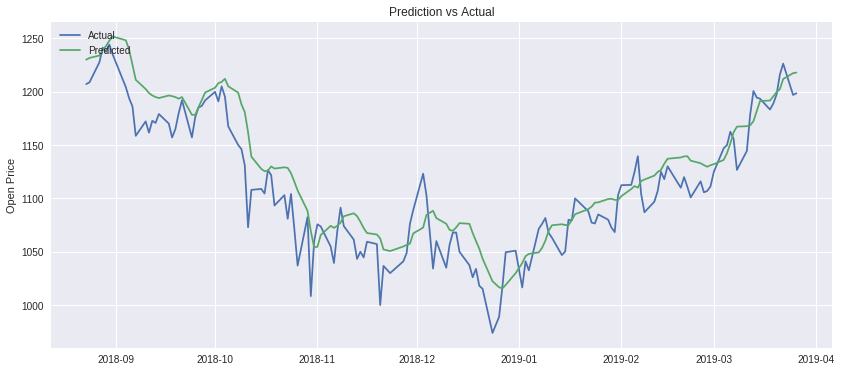

##################################################################################################
No. of Hidden layers = 2, no.of cells = 30, Time steps=50
Mean Squared Error
730.7545009328959


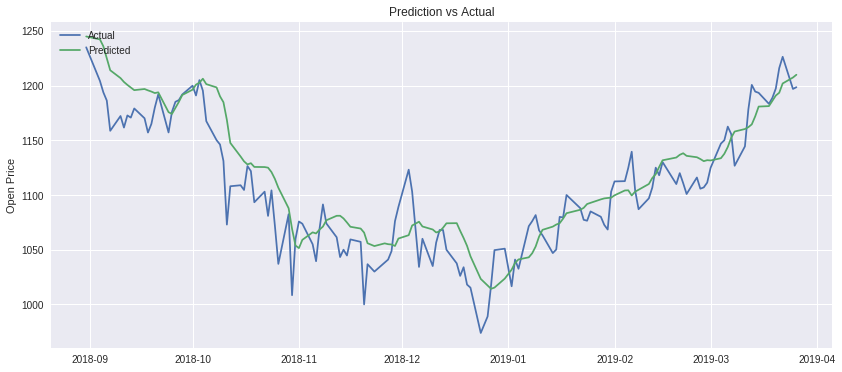

##################################################################################################
No. of Hidden layers = 2, no.of cells = 30, Time steps=75
Mean Squared Error
541.8675042127014


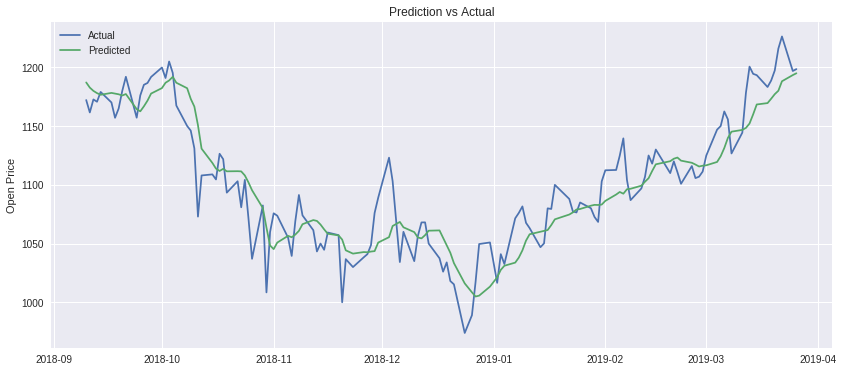

##################################################################################################
No. of Hidden layers = 2, no.of cells = 50, Time steps=20
Mean Squared Error
506.4564628113799


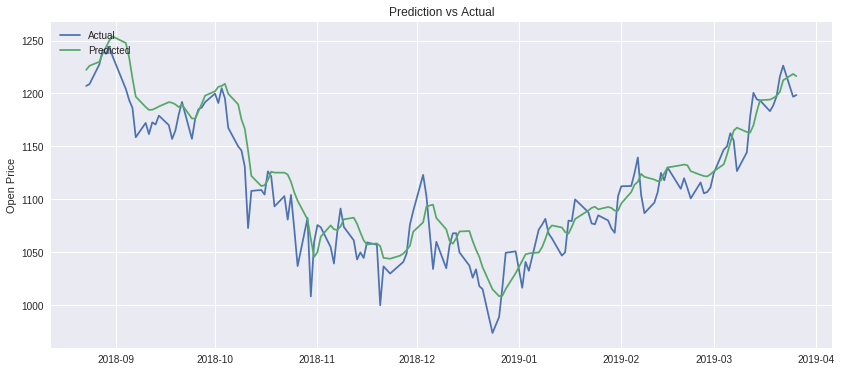

##################################################################################################
No. of Hidden layers = 2, no.of cells = 50, Time steps=50
Mean Squared Error
688.664752607641


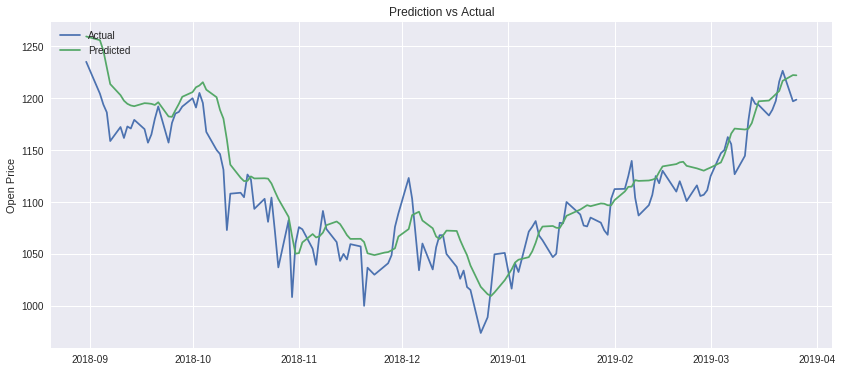

##################################################################################################
No. of Hidden layers = 2, no.of cells = 50, Time steps=75
Mean Squared Error
423.9262815334457


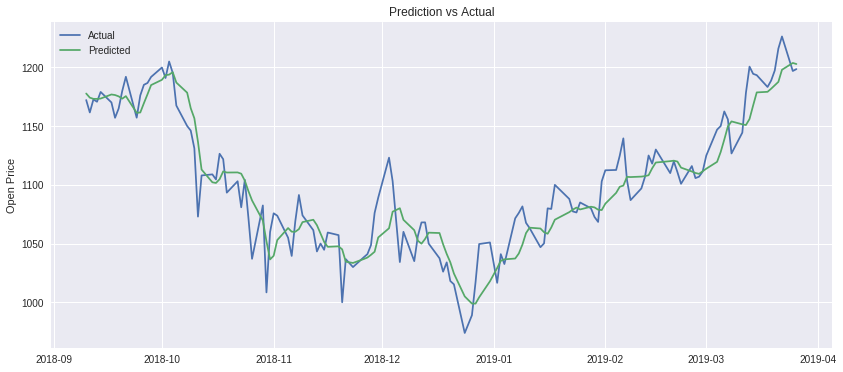

##################################################################################################
No. of Hidden layers = 2, no.of cells = 80, Time steps=20
Mean Squared Error
372.6826585617016


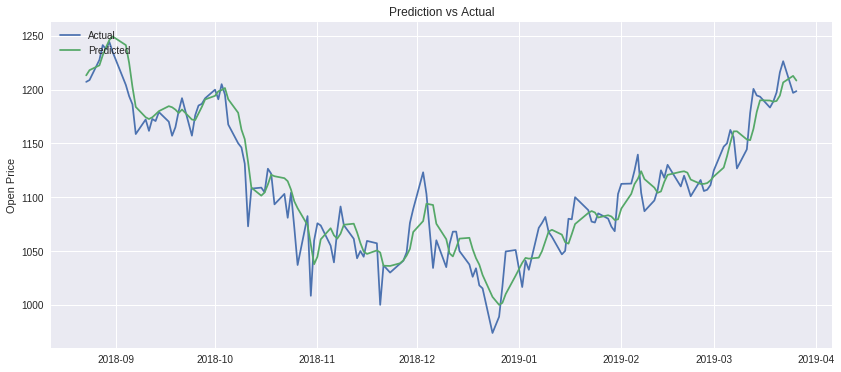

##################################################################################################
No. of Hidden layers = 2, no.of cells = 80, Time steps=50
Mean Squared Error
597.8676464281476


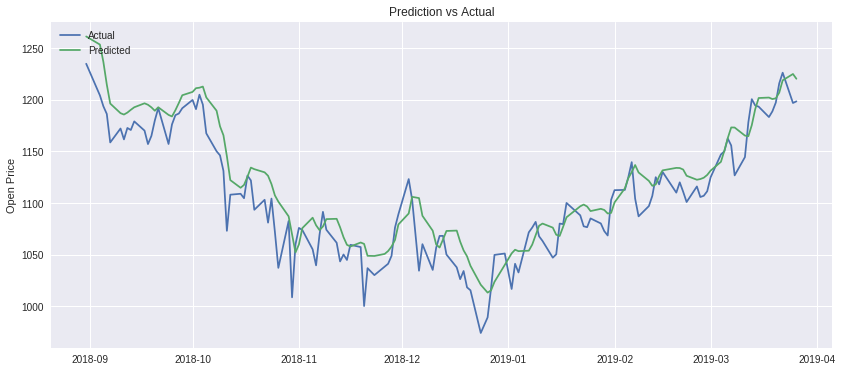

##################################################################################################
No. of Hidden layers = 2, no.of cells = 80, Time steps=75
Mean Squared Error
497.23186495968696


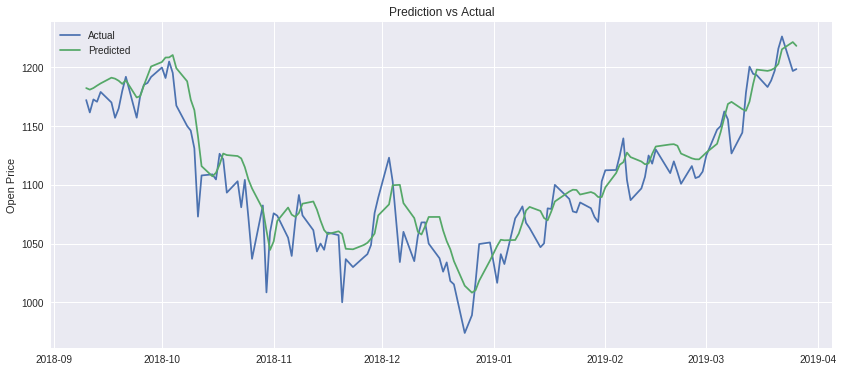

##################################################################################################
No. of Hidden layers = 3, no.of cells = 30, Time steps=20
Mean Squared Error
638.9829023863662


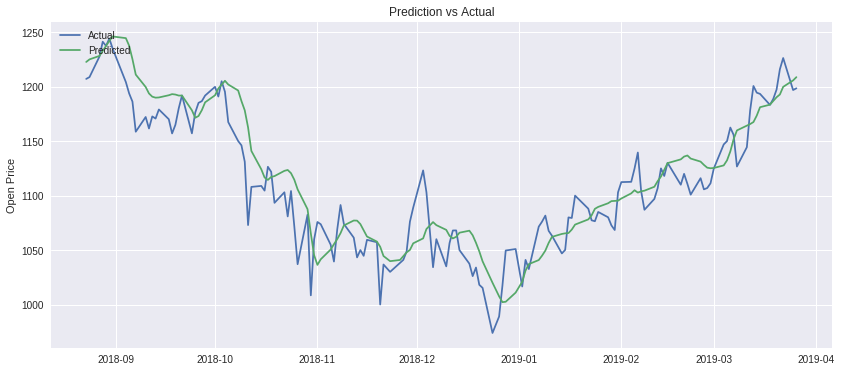

##################################################################################################
No. of Hidden layers = 3, no.of cells = 30, Time steps=50
Mean Squared Error
884.3280091098857


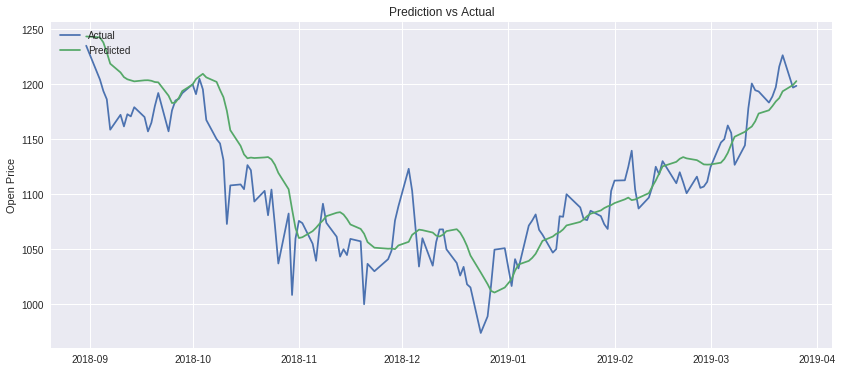

##################################################################################################
No. of Hidden layers = 3, no.of cells = 30, Time steps=75
Mean Squared Error
762.9323201814574


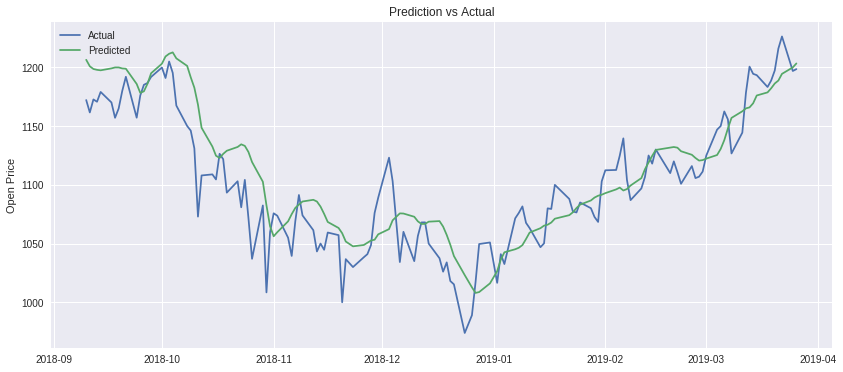

##################################################################################################
No. of Hidden layers = 3, no.of cells = 50, Time steps=20
Mean Squared Error
601.7579246368065


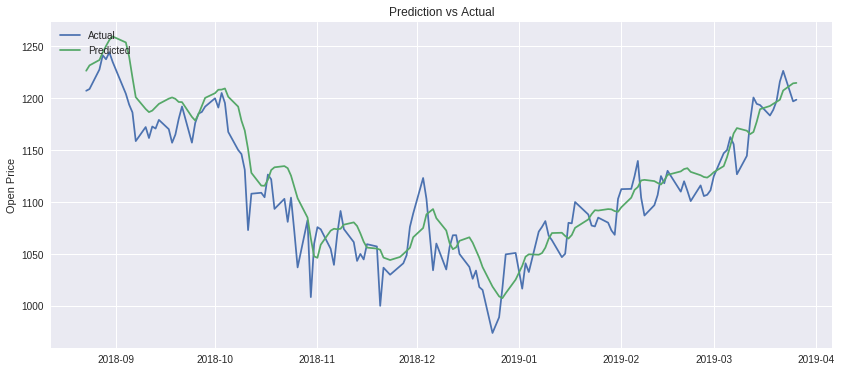

##################################################################################################
No. of Hidden layers = 3, no.of cells = 50, Time steps=50
Mean Squared Error
560.054522728405


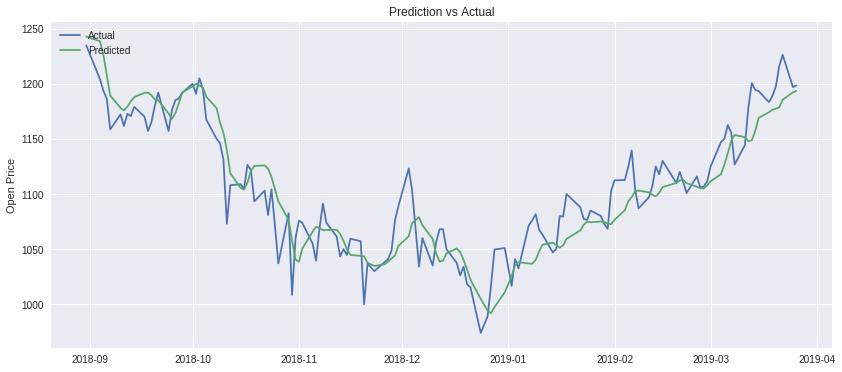

##################################################################################################
No. of Hidden layers = 3, no.of cells = 50, Time steps=75
Mean Squared Error
479.3152160407741


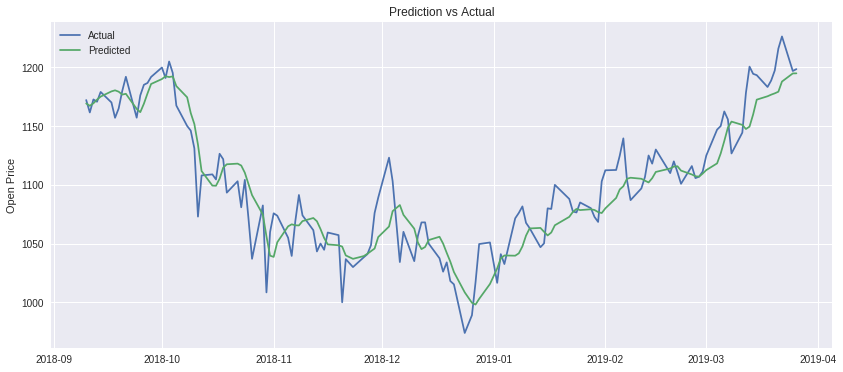

##################################################################################################
No. of Hidden layers = 3, no.of cells = 80, Time steps=20
Mean Squared Error
452.99556921757124


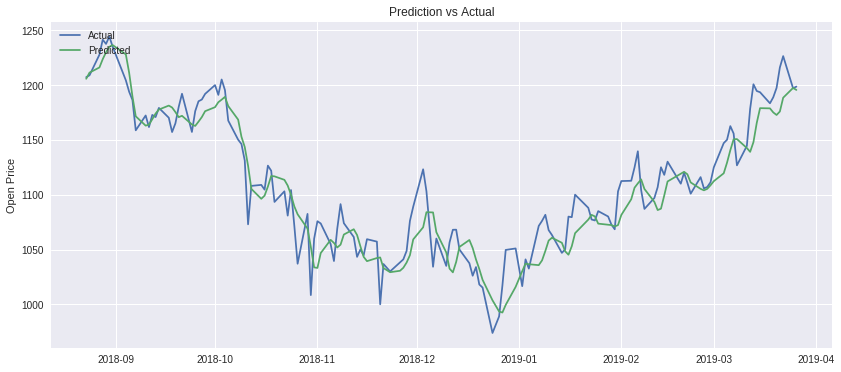

##################################################################################################
No. of Hidden layers = 3, no.of cells = 80, Time steps=50
Mean Squared Error
781.1943084186142


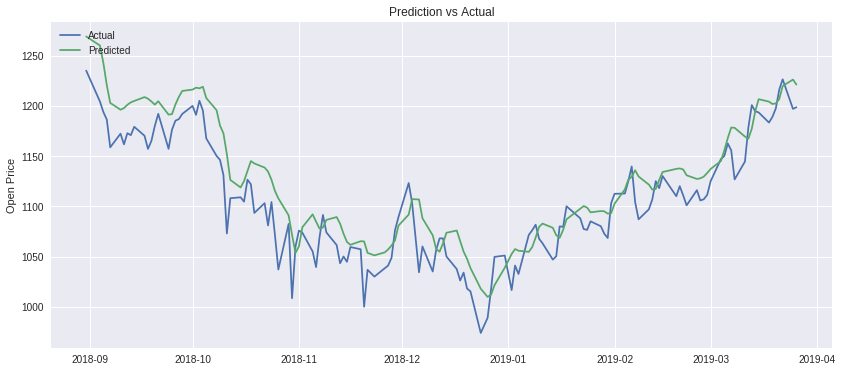

##################################################################################################
No. of Hidden layers = 3, no.of cells = 80, Time steps=75
Mean Squared Error
477.28147466453953


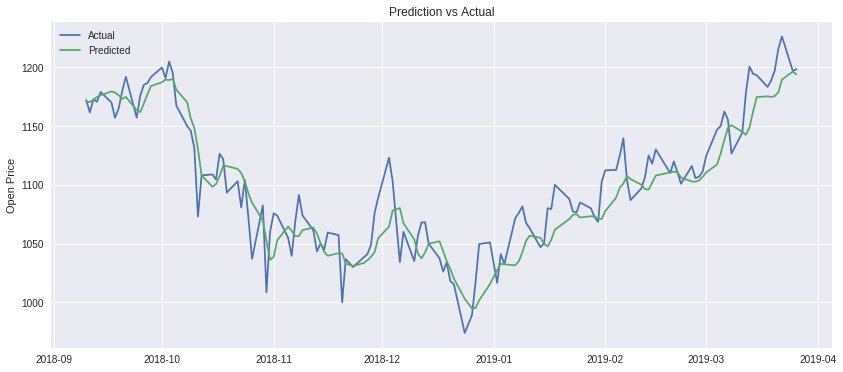

In [40]:
for layers in hidden_layers:
    for cells in no_cells:
        for step in time_steps:
            runRNN(layers,step,cells)

# Q1 - Part2
Perform stock prediction using HMM for the following configurations
![L1](q1-p2.png)

In [0]:
df_hmm = df[['volume','avg_price','open']]
df_hmm = df_hmm[::-1]

In [0]:
df_hmm.head()

DatetimeIndex(['2016-03-28', '2016-03-29', '2016-03-30', '2016-03-31',
               '2016-04-01', '2016-04-04', '2016-04-05', '2016-04-06',
               '2016-04-07', '2016-04-08',
               ...
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-18',
               '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22',
               '2019-03-25', '2019-03-26'],
              dtype='datetime64[ns]', name='date', length=755, freq=None)

In [0]:
class StockPredictor():
    '''
    Stock Predictor class to do stock forecasting
    '''
    def __init__(self, data, no_hidden_states, time_steps, test_size=0.2, n_iterations=1000):
        self.data = data.values
        self.axis = data.axes[0]
        self.test_size = test_size
        self.test_end = int(test_size*self.data.shape[0])
        self.no_hidden_states = no_hidden_states
        self.time_steps = time_steps
        self.n_iterations = n_iterations
    
    def doPrediction(self):
        '''
        Method to do stock forcasting on test data
        '''
        predicted_stock_data = np.empty([0,self.data.shape[1]])
        print("##################################################################################################")
        print("No. of Hidden states={0}, Time steps={1}".format(self.no_hidden_states,self.time_steps))
        ##Prediction for each row in test data
        for test_index in reversed(range(self.test_end+1)):
            train_data = self.data[test_index + 1:,:]
            test_data = self.data[test_index,:]
            
            if test_index == self.test_end:
                hmm_model = hmm.GaussianHMM(n_components=self.no_hidden_states, covariance_type='full',
                                        tol=0.0001, n_iter=self.n_iterations, init_params='stmc')
            else:
                hmm_model = hmm.GaussianHMM(n_components=self.no_hidden_states, covariance_type='full',
                                        tol=0.0001, n_iter=self.n_iterations, init_params='')
                hmm_model.transmat_ = transition_probability 
                hmm_model.startprob_ = start_probability
                hmm_model.means_ = gmm_means
                hmm_model.covars_ = gmm_covars
            
            train_reversed = np.flipud(train_data)
            hmm_model.fit(train_reversed)

            transition_probability = hmm_model.transmat_
            start_probability = hmm_model.startprob_
            gmm_means = hmm_model.means_
            gmm_covars = hmm_model.covars_

            ### finding the most similar block of data
            prev_scores = []
            curr_score = hmm_model.score(np.flipud(train_data[0:self.time_steps-1, :]))
            for i in range(1,train_data.shape[0]):
                if(i+self.time_steps - 2 >= train_data.shape[0]):
                    break
                temp_score = hmm_model.score(np.flipud(train_data[i:i + self.time_steps - 1, :]))
                prev_scores.append(temp_score)
            prev_scores = np.array(prev_scores)
            
            best_match_index = np.argmin(np.absolute(prev_scores - curr_score))
            pred_change = train_data[best_match_index,:] - train_data[best_match_index + 1,:]#*(np.sign(curr_score-prev_scores[best_match_index]))
            predicted_stock_data = np.vstack((predicted_stock_data, self.data[test_index + 1,:] + pred_change))
            
        ##printing error
        print("Mean Squared Error")
        print(metrics.mean_squared_error(np.flipud(self.data[range(self.test_end+1),-1]),predicted_stock_data[:,-1]))

        ##Plotting actual vs predicted
        fig, ax = plt.subplots()
        fig.set_size_inches(14,6)
        ax = plt.subplot(1, 1, 1)
        ax.plot(np.flip(self.axis[range(self.test_end+1)], axis=0), np.flipud(self.data[range(self.test_end+1),-1]), label="Actual")
        ax.plot(np.flip(self.axis[range(self.test_end+1)], axis=0), predicted_stock_data[:,-1],label="Predicted")
        ax.set_ylabel("Open Price")
        ax.set_title("Prediction vs Actual")
        ax.legend(loc='upper left')
        plt.show()
        return predicted_stock_data[:,-1]

In [0]:
def computeStockPredictions(df_hmm, no_hidden_states, time_steps):
    '''
    Function to compute stock predictions for different hidden_states/time_steps
    '''
    for h_states in no_hidden_states:
        for time_step in time_steps:
            sp = StockPredictor(df_hmm, h_states, time_step)
            sp.doPrediction()

In [0]:
no_hidden_states = [4,8,12]
time_steps = [20,50,75]

##################################################################################################
No. of Hidden states=4, Time steps=20
Mean Squared Error
695.2402557565789


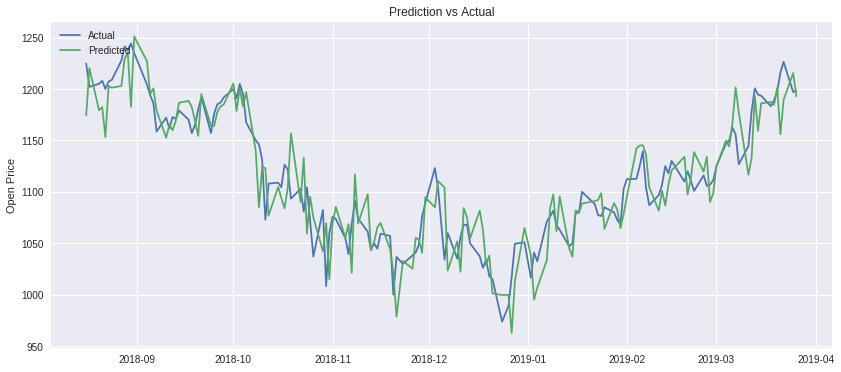

##################################################################################################
No. of Hidden states=4, Time steps=50
Mean Squared Error
800.9651536184207


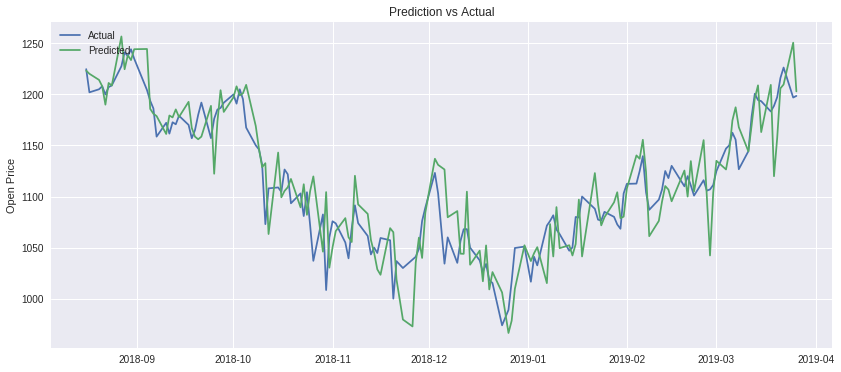

##################################################################################################
No. of Hidden states=4, Time steps=75
Mean Squared Error
1005.4220692434204


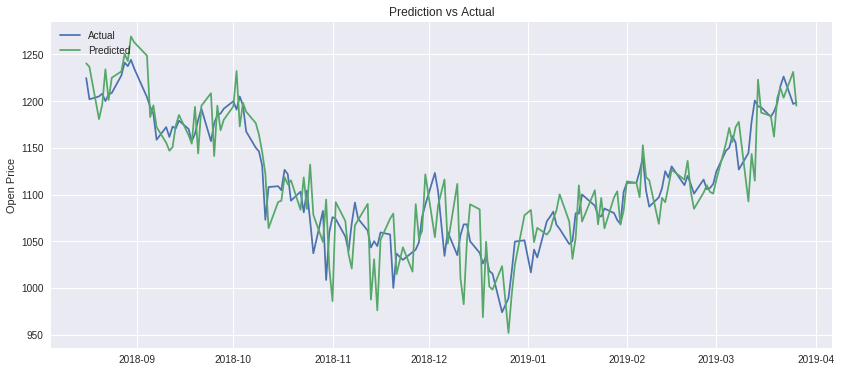

##################################################################################################
No. of Hidden states=8, Time steps=20
Mean Squared Error
790.478644078947


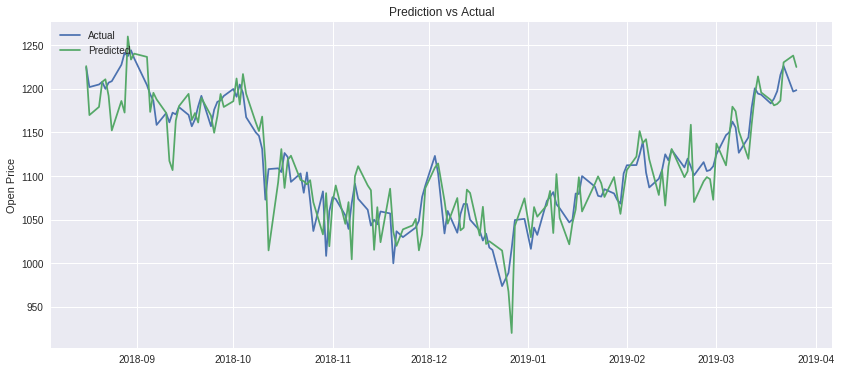

##################################################################################################
No. of Hidden states=8, Time steps=50
Mean Squared Error
1031.5755161184209


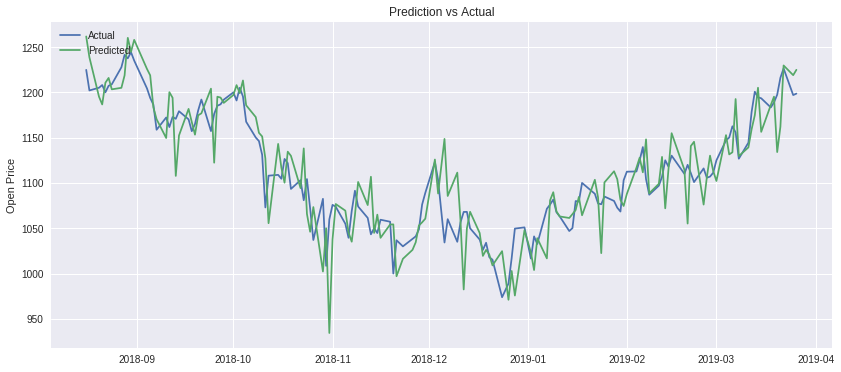

##################################################################################################
No. of Hidden states=8, Time steps=75
Mean Squared Error
1153.7497128289474


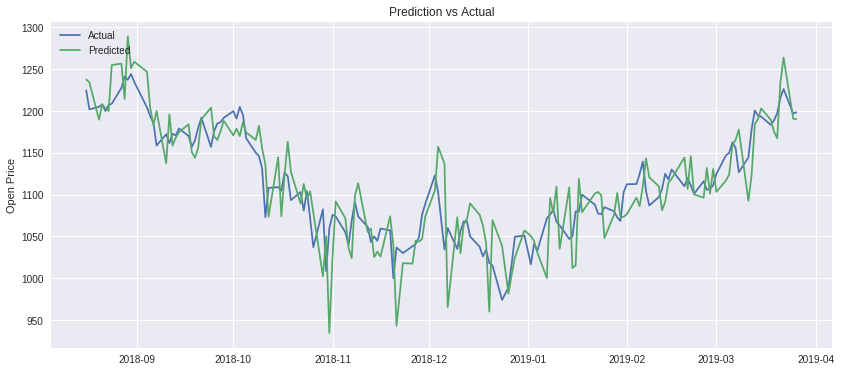

##################################################################################################
No. of Hidden states=12, Time steps=20
Mean Squared Error
822.8156070723676


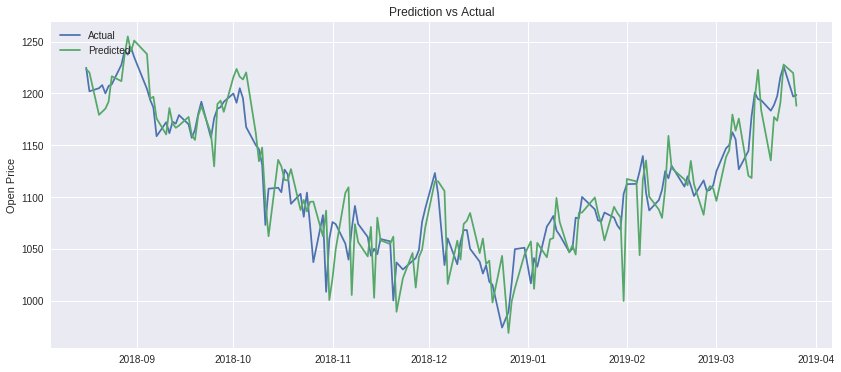

##################################################################################################
No. of Hidden states=12, Time steps=50
Mean Squared Error
817.0637601973682


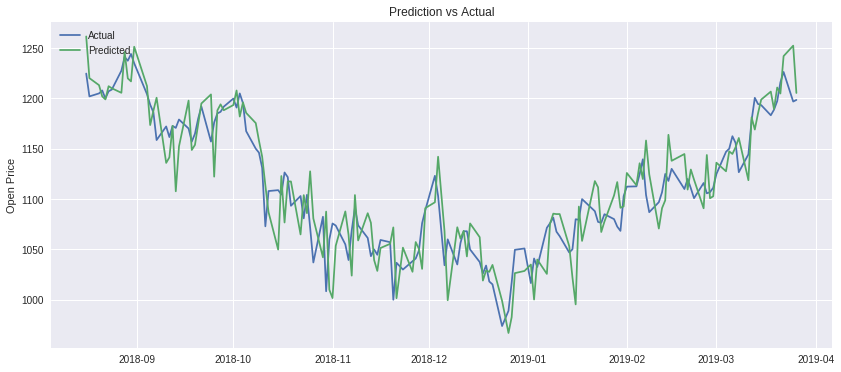

##################################################################################################
No. of Hidden states=12, Time steps=75
Mean Squared Error
843.6186856907893


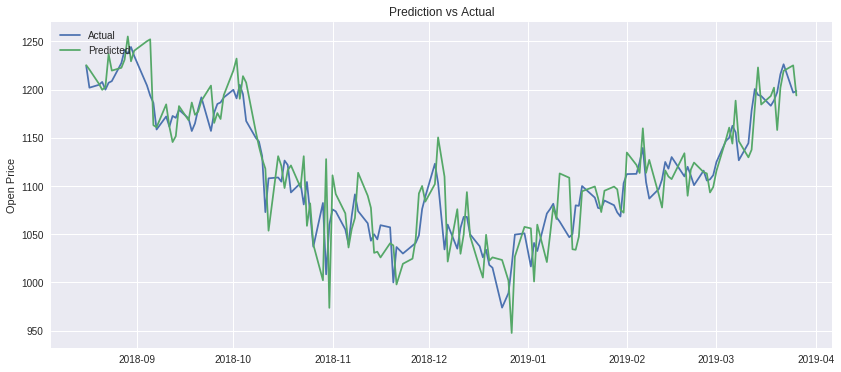

In [0]:
computeStockPredictions(df_hmm, no_hidden_states, time_steps)

# Q1 - Part 3
Compare the results of any one combination from RNN with any one combination from HMM.

In [157]:
pred_rnn, mse_rnn = runRNN(2,20,30)

##################################################################################################
No. of Hidden layers = 2, no.of cells = 30, Time steps=20


In [142]:
sp = StockPredictor(df_hmm, 4, 20)
pred_hmm, mse_hmm = sp.doPrediction()

##################################################################################################
No. of Hidden states=4, Time steps=20


In [158]:
pred_size = min(len(pred_rnn), len(pred_hmm))
pred_rnn_final = pred_rnn[-pred_size:]
pred_hmm_final = pred_hmm[-pred_size:]
y_actual = df_Y[-pred_size:]
y_actual = sc_Y.inverse_transform(y_actual.reshape(1,-1)).flatten()
y_val_label_final = df.index.values[-pred_size:]

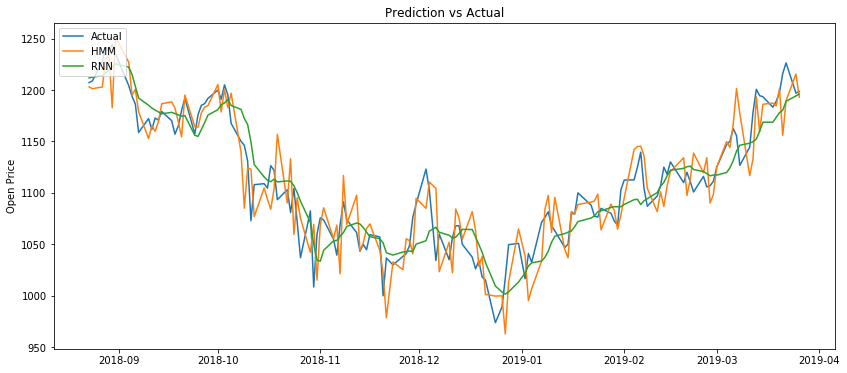

In [166]:
##Plotting actual vs predicted
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
ax = plt.subplot(1, 1, 1)
ax.plot(y_val_label_final, y_actual, label="Actual")
ax.plot(y_val_label_final, pred_hmm_final,label="HMM")
ax.plot(y_val_label_final, pred_rnn_final,label="RNN")
ax.set_ylabel("Open Price")
ax.set_title("Prediction vs Actual")
ax.legend(loc='upper left')
plt.show()

# Question 2
Given a DNA sequence and a state path sequence, find the probability that
the given DNA sequence is generated from the given path sequence only.
![L1](q2.png)
- Input DNA sequence: “CTTCATGTGAAAGCAGACGTAAGTCA”
- Input State path sequence: “EEEEEEEEEEEEEEEEEE5IIIIIII$”
- Emission & Transition probabilities can be found from above figure
- Output: State path probability for above state path [Log probability required i.e.log(p)]

In [0]:
emmission_probs={'E':{'A':0.25,'C':0.25,'G':0.25,'T':0.25},
                 '5':{'A':0.05,'C':0,'G':0.95,'T':0},
                 'I':{'A':0.4,'C':0.1,'G':0.1,'T':0.4}
                }
transition_probs={'^':{'E':1},'E':{'E':0.9,'5':0.1},'5':{'I':1},'I':{'I':0.9,'$':0.1}}
sequence="CTTCATGTGAAAGCAGACGTAAGTCA"
state_path="^EEEEEEEEEEEEEEEEEE5IIIIIII$"

In [0]:
'''
Computing the probability for the given input sequence
'''
res_prob = 1
for i, s in enumerate(state_path):
    if(s == "$"):
        break
    if(s != "^"):
        res_prob *= emmission_probs[s][sequence[i-1]]
    res_prob *= transition_probs[s][state_path[i+1]]

In [0]:
print("Log Probability for the given path is: {0}".format(math.log(res_prob)))

Log Probability for the given path is: -41.21967768602254
